In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [24]:
df = pd.read_csv("/content/df.csv")
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
df.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [27]:
df.drop('id', axis = 1, inplace = True)

In [28]:
df.describe()

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<BarContainer object of 2 artists>

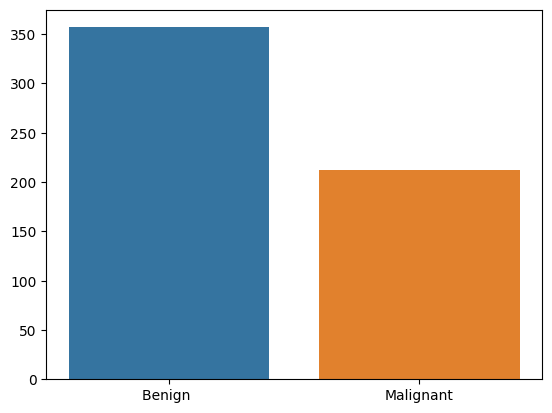

In [29]:
plt.bar(["Benign ","Malignant"],df['diagnosis'].value_counts(),color=['#3574a0', '#e1812d'])

**Relationship** between the different features and the diagnosis of the tumor
**bold text**

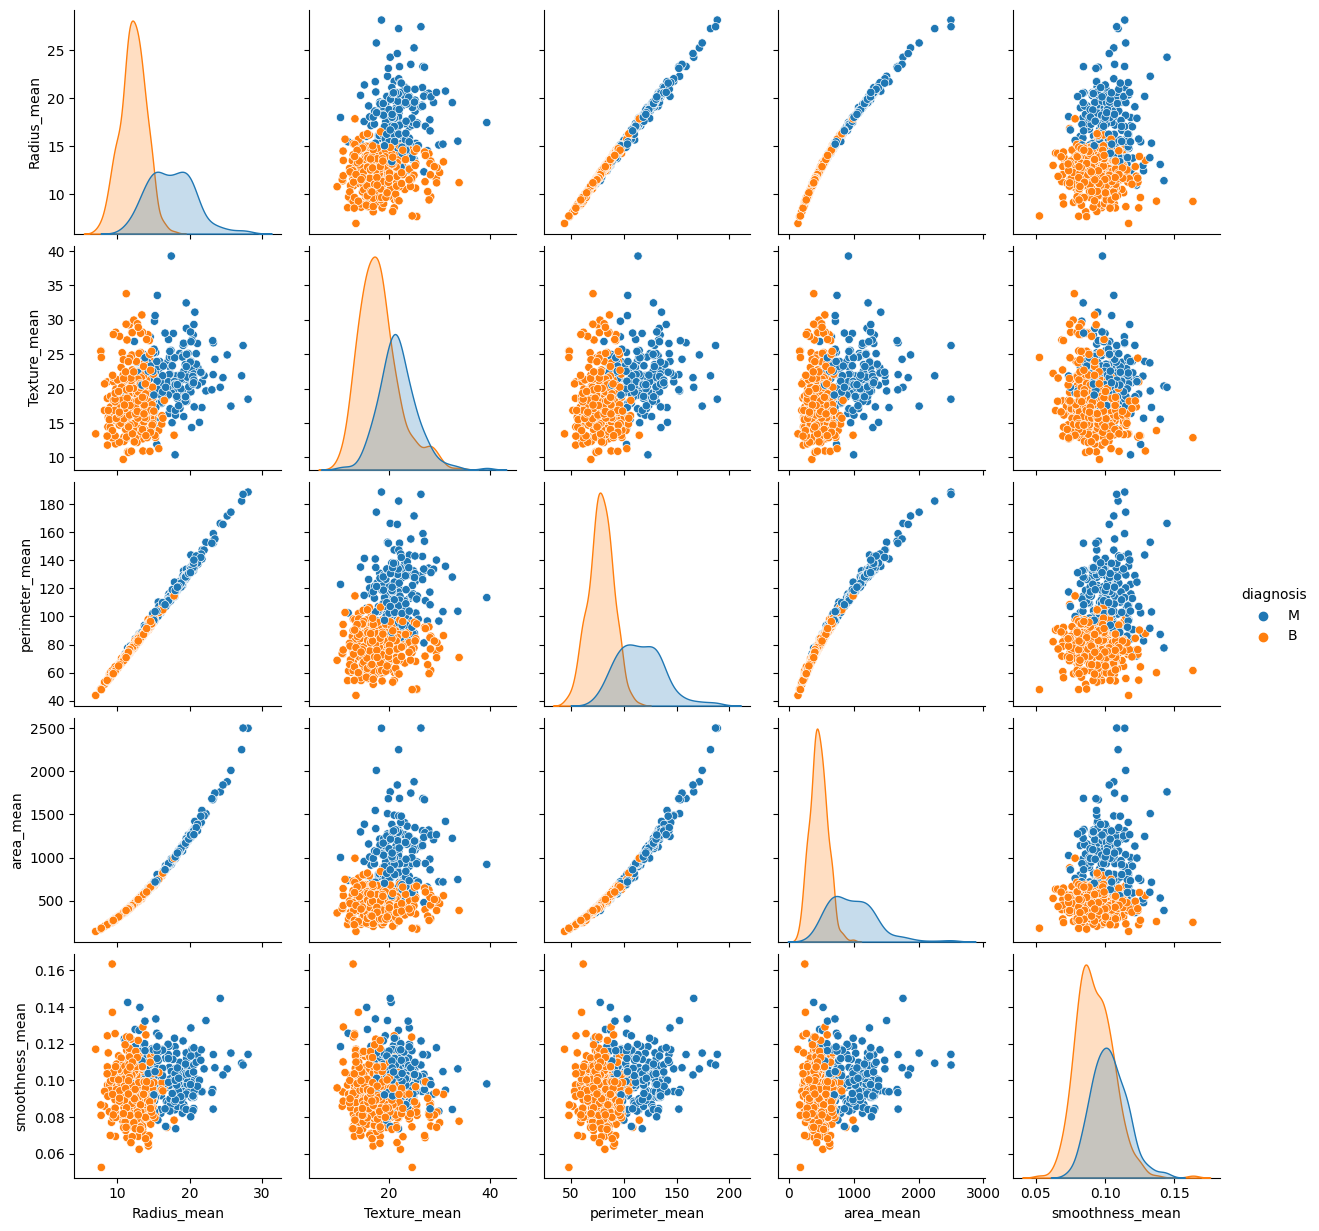

In [30]:
sns.pairplot(df, hue='diagnosis', vars=['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.show()

**Bar plot to analyze the data and compare the distribution of malignant & benign tumors**

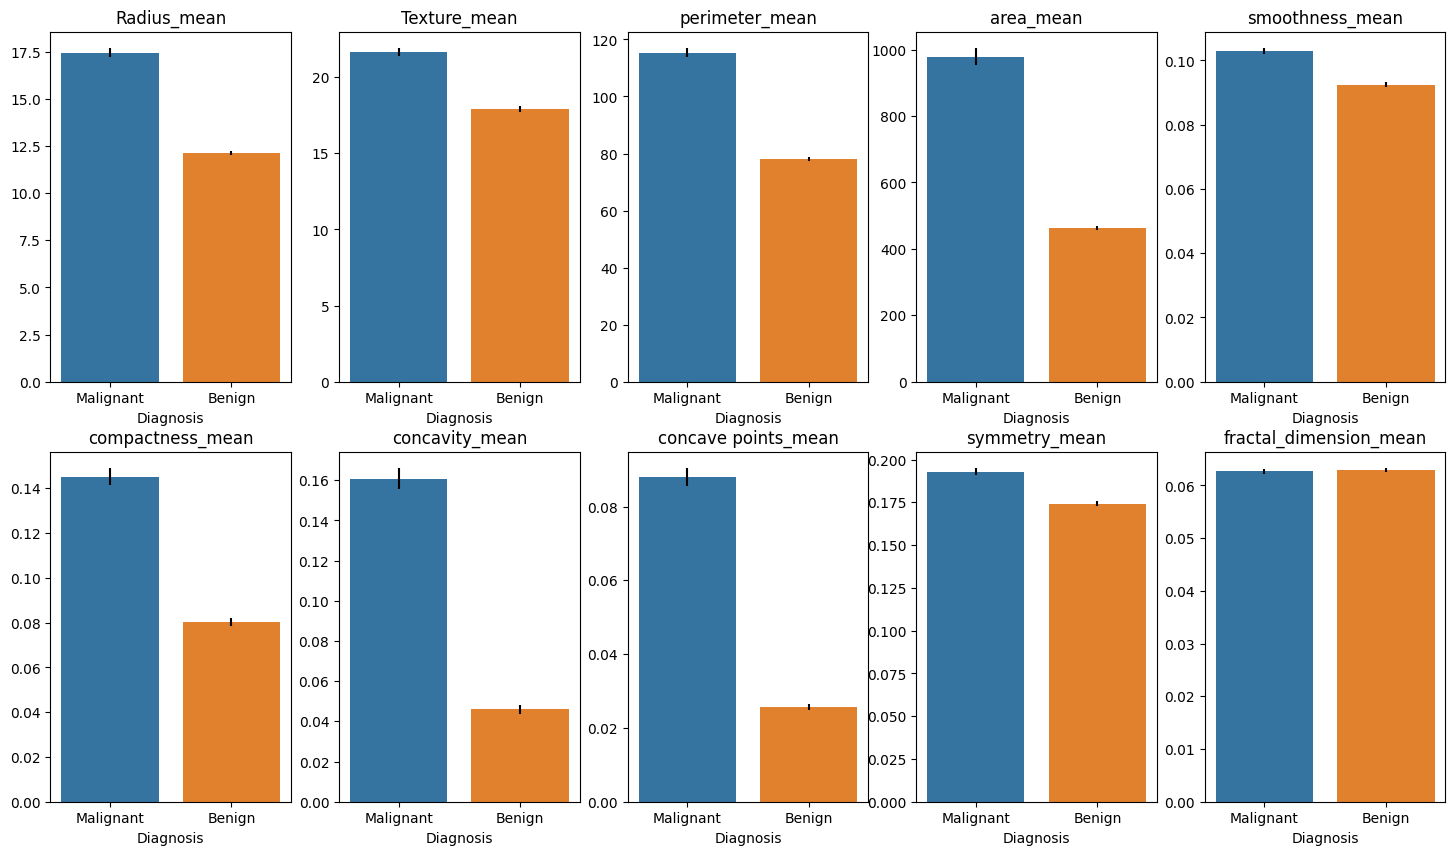

In [31]:
# Create separate dataframes for malignant and benign tumors
malignant = df[df['diagnosis'] == 'M']
benign = df[df['diagnosis'] == 'B']

# Select the features of interest
features = ['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

# Iterate through the features
for i, feature in enumerate(features[:int(len(features)/2)]):
    # Create a bar chart for each feature
    ax = axes[0, i]
    ax.bar(['Malignant', 'Benign'], [malignant[feature].mean(), benign[feature].mean()], yerr=[malignant[feature].sem(), benign[feature].sem()], color=['#3574a0', '#e1812d'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature)
    
for i, feature in enumerate(features[int(len(features)/2):]):
    # Create a bar chart for each feature
    ax = axes[1, i]
    ax.bar(['Malignant', 'Benign'], [malignant[feature].mean(), benign[feature].mean()], yerr=[malignant[feature].sem(), benign[feature].sem()], color=['#3574a0', '#e1812d'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature)


# Show the figure
plt.show()

**Correlation plot**

<ipython-input-32-753ca5bff919>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

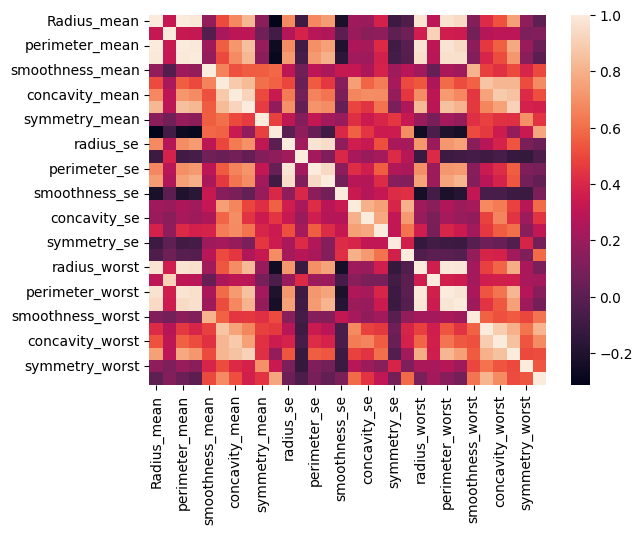

In [32]:
corr = df.corr()
sns.heatmap(corr)

In [33]:
X = df.drop('diagnosis' , axis=1)
y = df.diagnosis

Preprocessing : Dimension reduction

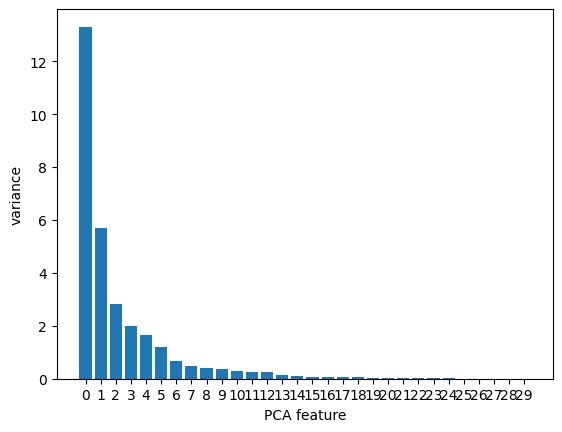

In [36]:
ss = StandardScaler()
X = ss.fit_transform(X)
pca = PCA()
pca.fit(X)
features = range(pca.n_components_)
plt.bar(features , pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [37]:
pca = PCA(n_components = 15)
X = pca.fit_transform(X)
X.shape

(569, 15)

**Modeling**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25 , random_state = 40)
results = pd.DataFrame()

**Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(X_test)

In [43]:
lr_acc = accuracy_score(y_test,y_pred)
print(lr_acc)

0.972027972027972


In [44]:
print('Confusion matrix:  ')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:  ')
print(classification_report(y_test, y_pred))

Confusion matrix:  
[[96  2]
 [ 2 43]]
Classification Report:  
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        98
           M       0.96      0.96      0.96        45

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [45]:
tempResults = pd.DataFrame({'Model':['Logistic Regression Classifier'],'Accuracy':[lr_acc]})
results = pd.concat([results, tempResults])

**Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred = dt.predict(X_test)

In [48]:
dt_acc = accuracy_score(y_test,y_pred)
print(dt_acc)

0.9370629370629371


In [49]:
print('Confusion matrix:  ')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:  ')
print(classification_report(y_test, y_pred))

Confusion matrix:  
[[93  5]
 [ 4 41]]
Classification Report:  
              precision    recall  f1-score   support

           B       0.96      0.95      0.95        98
           M       0.89      0.91      0.90        45

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [50]:
tempResults = pd.DataFrame({'Model':['Decision Tree Classifier'],'Accuracy':[dt_acc]})
results = pd.concat([results, tempResults])

**Support Vector Classifier**

In [51]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [52]:
y_pred = svc.predict(X_test)

In [53]:
svc_acc = accuracy_score(y_test,y_pred)
print(svc_acc)

0.986013986013986


In [54]:
print('Confusion matrix:  ')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:  ')
print(classification_report(y_test, y_pred))

Confusion matrix:  
[[97  1]
 [ 1 44]]
Classification Report:  
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        98
           M       0.98      0.98      0.98        45

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [55]:
tempResults = pd.DataFrame({'Model':['Support Vector Classifier'],'Accuracy':[svc_acc]})
results = pd.concat([results, tempResults])

**Random Forest Classifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rfc.predict(X_test)

In [58]:
rfc_acc = accuracy_score(y_test,y_pred)
print(rfc_acc)

0.972027972027972


In [ ]:
print('Confusion matrix:  ')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:  ')
print(classification_report(y_test, y_pred))

In [60]:
tempResults = pd.DataFrame({'Model':['Random Forest Classifier'],'Accuracy':[rfc_acc]})
results = pd.concat([results, tempResults])

**Conclusion**

In [ ]:
results

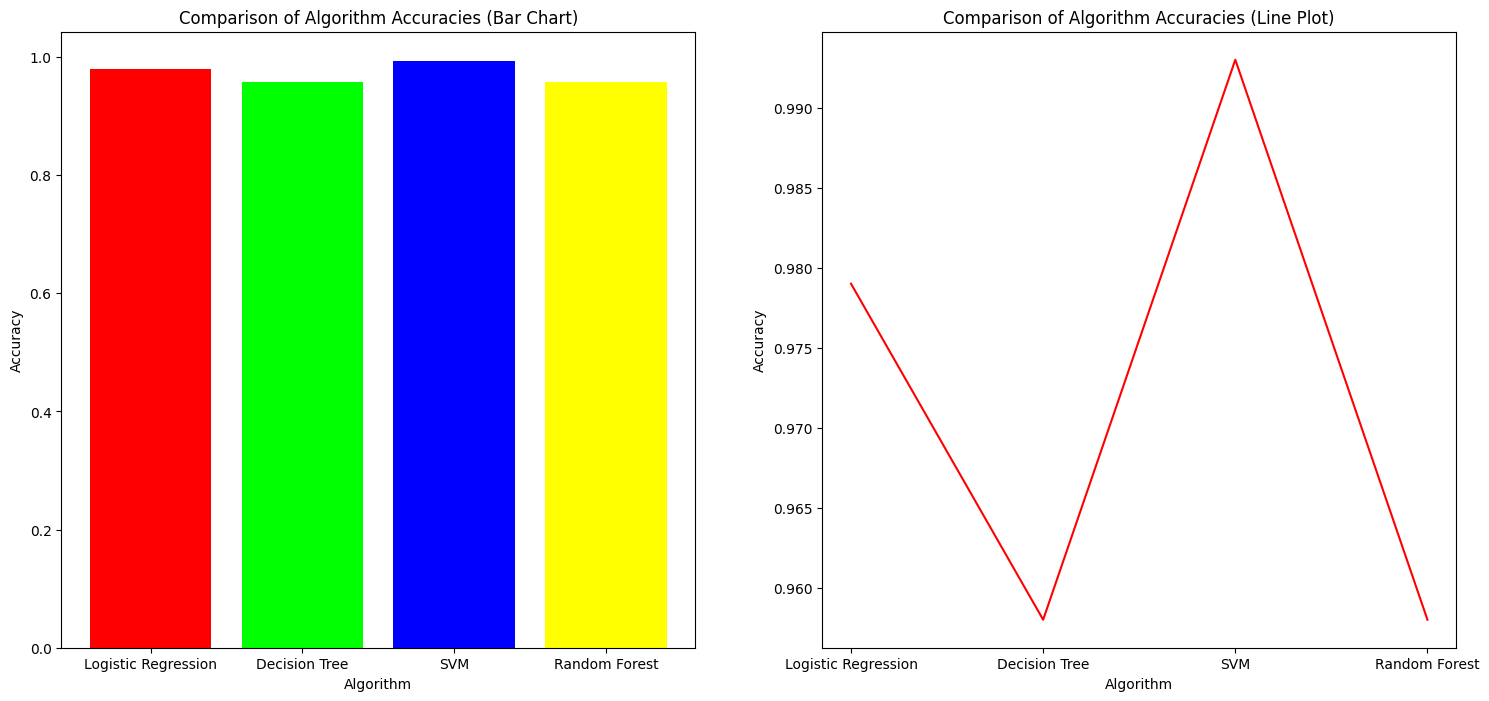

In [61]:
# List of algorithms
algorithms = ["Logistic Regression", "Decision Tree", "SVM", "Random Forest"]

# List of accuracy scores
accuracies = [0.979021, 0.958042, 0.993007, 0.958042]

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Create a bar chart to visualize the results
colors = ["#ff0000", "#00ff00", "#0000ff", "#ffff00"]
for i, algo in enumerate(algorithms):
    ax1.bar(algo, accuracies[i], color=colors[i])


# Add labels and title to the bar chart
ax1.set_xlabel("Algorithm")
ax1.set_ylabel("Accuracy")
ax1.set_title("Comparison of Algorithm Accuracies (Bar Chart)")

# Create a line plot to visualize the results
ax2.plot(algorithms, accuracies, color='#ff0000')

# Add labels and title to the line plot
ax2.set_xlabel("Algorithm")
ax2.set_ylabel("Accuracy")
ax2.set_title("Comparison of Algorithm Accuracies (Line Plot)")

# Show the figure
plt.show()